In [1]:
import torch
from NLPUtils import *

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
with open('text8','r') as file:
    corpus = file.read()
    corpus = [corpus.split(' ')]

In [3]:
# Modelo de lenguaje:
method = 'SkipGram'
window_size = 2
embedding_dim = 200
cutoff_freq = 5
pretrained = None

# Parámetros de iteración:
batch_size = 128
use_gpu = 1

trainer = WordVectorsSGD(corpus,cutoff_freq=cutoff_freq,lm=method,window_size=window_size,batch_size=batch_size,embedding_dim=embedding_dim,use_gpu=use_gpu)
trainer.init_embeddings()

Word2vec trainer created:
Model used: SkipGram
Window size: 2
Embedding dimension: 200
Number of samples: 17005208
Vocabulary Size: 71290
Discarted words with frequency less than 5
Number of batches: 132854
Number of samples per batch: 128



In [9]:
epochs = 2
learning_rate = 1e-1
sample_loss_every = 100

trainer.train(epochs=epochs, learning_rate=learning_rate, sample_loss_every=sample_loss_every)

Resuming training...
Optimization method: Stochastic Gradient Descent
Learning Rate: 0.1
Number of epochs: 2
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 8.824268341064453
Epoch: 1, Batch number: 100, Loss: 8.798402786254883
Epoch: 1, Batch number: 200, Loss: 8.559398651123047
Epoch: 1, Batch number: 300, Loss: 8.968395233154297
Epoch: 1, Batch number: 400, Loss: 8.547080993652344
Epoch: 1, Batch number: 500, Loss: 8.916963577270508
Epoch: 1, Batch number: 600, Loss: 8.668951034545898
Epoch: 1, Batch number: 700, Loss: 8.935578346252441
Epoch: 1, Batch number: 800, Loss: 8.844799041748047
Epoch: 1, Batch number: 900, Loss: 9.256491661071777
Epoch: 1, Batch number: 1000, Loss: 9.157456398010254
Epoch: 1, Batch number: 1100, Loss: 8.673279762268066
Epoch: 1, Batch number: 1200, Loss: 8.802847862243652
Epoch: 1, Batch number: 1300, Loss: 8.809834480285645
Epoch: 1, Batch number: 1400, Loss: 9.131165504455566
Epoch: 1, Batch number: 1500, Loss: 8.870661735534668
Epoch: 1, B

Epoch: 1, Batch number: 14900, Loss: 8.68547534942627
Epoch: 1, Batch number: 15000, Loss: 8.683638572692871
Epoch: 1, Batch number: 15100, Loss: 8.99367618560791
Epoch: 1, Batch number: 15200, Loss: 8.821786880493164
Epoch: 1, Batch number: 15300, Loss: 8.526091575622559
Epoch: 1, Batch number: 15400, Loss: 8.588654518127441
Epoch: 1, Batch number: 15500, Loss: 8.381420135498047
Epoch: 1, Batch number: 15600, Loss: 8.73709487915039
Epoch: 1, Batch number: 15700, Loss: 8.398369789123535
Epoch: 1, Batch number: 15800, Loss: 8.66107177734375
Epoch: 1, Batch number: 15900, Loss: 8.366321563720703
Epoch: 1, Batch number: 16000, Loss: 8.280974388122559
Epoch: 1, Batch number: 16100, Loss: 8.524577140808105
Epoch: 1, Batch number: 16200, Loss: 8.255610466003418
Epoch: 1, Batch number: 16300, Loss: 8.458720207214355
Epoch: 1, Batch number: 16400, Loss: 8.679384231567383
Epoch: 1, Batch number: 16500, Loss: 8.38164234161377
Epoch: 1, Batch number: 16600, Loss: 8.380619049072266
Epoch: 1, Batch

<IPython.core.display.Javascript object>


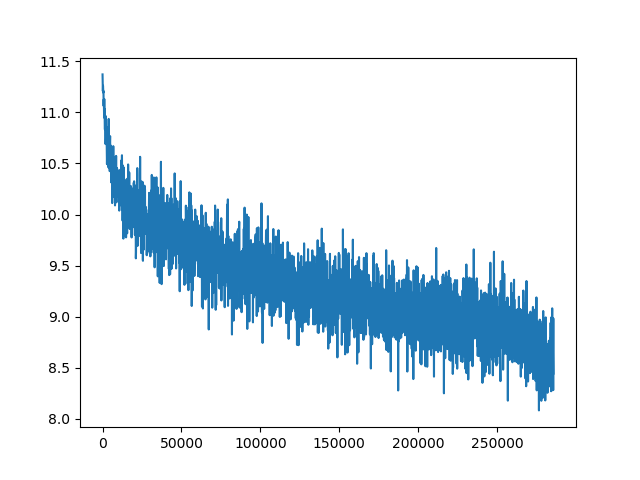

In [10]:
fig, ax = plt.subplots()
ax.plot(trainer.loss_history['iter'],trainer.loss_history['loss'])

In [6]:
embeddings = trainer.model.emb.weight.data
vocab = trainer.dataloader.dataset.vocabulary

print(embeddings.size())
print(vocab)

torch.Size([71291, 200])
<Vocabulary(size=71290)>


In [8]:
distance = torch.nn.CosineSimilarity()
word = 'anarchism'
word_emb = embeddings[vocab.token_to_index(word),:]
dist = distance(embeddings,word_emb.view(1,-1).repeat(len(vocab)+1,1))
dist_idx = torch.argsort(dist,descending=True)
for i in range(10):
    print(vocab.index_to_token(dist_idx[i].item()))

anarchism
whisked
sisulu
shortage
ceo
picabia
pontchartrain
tivo
polymorphism
qualifying


In [3]:
# Modelo de lenguaje:
method = 'CBOW'
window_size = 4
embedding_dim = 200
cutoff_freq = 5
pretrained = None

# Parámetros de iteración:
batch_size = 512
use_gpu = None

trainer2 = WordVectorsSGD(corpus,cutoff_freq=cutoff_freq,lm=method,window_size=window_size,batch_size=batch_size,embedding_dim=embedding_dim,use_gpu=use_gpu)
trainer2.init_embeddings()

Word2vec trainer created:
Model used: CBOW
Window size: 4
Embedding dimension: 200
Number of samples: 17005208
Vocabulary Size: 71290
Discarted words with frequency less than 5
Number of batches: 33214
Number of samples per batch: 512



In [5]:
epochs = 2
learning_rate = 5e-1
sample_loss_every = 100

trainer2.train(epochs=epochs, learning_rate=learning_rate, sample_loss_every=sample_loss_every)

Starting training...
Optimization method: Stochastic Gradient Descent
Learning Rate: 0.5
Number of epochs: 2
Running on device (cpu)

torch.Size([512, 71290])
torch.Size([512])


RuntimeError: Assertion `cur_target >= 0 && cur_target < n_classes' failed.  at /opt/conda/conda-bld/pytorch_1570910687650/work/aten/src/THNN/generic/ClassNLLCriterion.c:97

In [ ]:
fig, ax = plt.subplots()
ax.plot(trainer2.loss_history['iter'],trainer2.loss_history['loss'])

In [3]:
#corpus = [['hola', 'soy', 'lauti'],['hola', 'soy', 'guadi'], ['chau', 'soy', 'luna','me','quiero','ir']]

# Modelo de lenguaje:
method = 'CBOW'
window_size = 4
embedding_dim = 200
cutoff_freq = 4
pretrained = None

# Parámetros de iteración:
batch_size = 512
use_gpu = 1

trainer2 = WordVectorsSGD(corpus,cutoff_freq=cutoff_freq,lm=method,window_size=window_size,batch_size=batch_size,embedding_dim=embedding_dim,use_gpu=use_gpu)
trainer2.init_embeddings()

Word2vec trainer created:
Model used: CBOW
Window size: 4
Embedding dimension: 200
Number of samples: 16718724
Vocabulary Size: 253855
Discarted words with frequency less than 4. Total words leaved: 71290
Number of batches: 32654
Number of samples per batch: 512



In [4]:
epochs = 3
learning_rate = 1e-1
sample_loss_every = 100

trainer2.train(epochs=epochs, learning_rate=learning_rate, sample_loss_every=sample_loss_every)

Starting training...
Optimization method: Stochastic Gradient Descent
Learning Rate: 0.1
Number of epochs: 3
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 12.470743179321289
Epoch: 1, Batch number: 100, Loss: 12.243584632873535
Epoch: 1, Batch number: 200, Loss: 11.986103057861328
Epoch: 1, Batch number: 300, Loss: 11.791057586669922
Epoch: 1, Batch number: 400, Loss: 11.544855117797852
Epoch: 1, Batch number: 500, Loss: 11.376398086547852
Epoch: 1, Batch number: 600, Loss: 11.21189022064209
Epoch: 1, Batch number: 700, Loss: 11.204339981079102
Epoch: 1, Batch number: 800, Loss: 10.860002517700195
Epoch: 1, Batch number: 900, Loss: 10.763002395629883
Epoch: 1, Batch number: 1000, Loss: 10.70750617980957
Epoch: 1, Batch number: 1100, Loss: 11.036375999450684
Epoch: 1, Batch number: 1200, Loss: 10.623760223388672
Epoch: 1, Batch number: 1300, Loss: 10.7520170211792
Epoch: 1, Batch number: 1400, Loss: 10.239197731018066
Epoch: 1, Batch number: 1500, Loss: 10.492321014404297

<IPython.core.display.Javascript object>


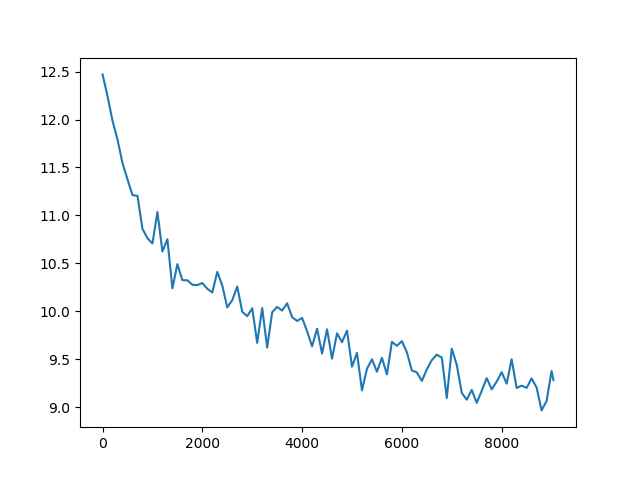

In [5]:
fig, ax = plt.subplots()
ax.plot(trainer2.loss_history['iter'],trainer2.loss_history['loss'])